<a href="https://colab.research.google.com/github/heberthfs/insuficiencia-cardiaca/blob/main/insufici%C3%AAncia_card%C3%ADaca_por_creatinina_s%C3%A9rica_e_fra%C3%A7%C3%A3o_de_eje%C3%A7%C3%A3o_isolada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pograma criado por: Hebert Falcao Sales
Objetivo:
determinar o alto risco de um paciente ter doença cardiovascular com base nos estudos de fatores de alto risco,utilizando direfentes modelos preditivosp ara classificar seu estado.

Sendo separado em 6 partes.
1. Importação das Biliotecas.
2. Importação dos dados.
3. Leitura dos dados.
4. Remoção dos dados.
5. Criação dos modelos.
6. Analise dos modelos.

## **1.0 Importação das bibliotecas**

In [12]:
#Bibliotecas de manipulação de dadis

import pandas as pd

#Bibliotecas matemáticas 
import scipy as sp
import numpy as np

#Bibliotecas de vizualição da dados
from matplotlib import  pyplot as plt
import seaborn as sns

#Seleção de modelogem
from sklearn.model_selection import train_test_split

#metricas
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, f1_score,precision_score, recall_score)

#Modelos de apreziagem
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.neural_network import MLPClassifier
# XGBoost model
import xgboost as xgb

## **2.0 Importação dos dados**

Donwload do banco da dados

In [13]:
!gdown --id '1QND9jQ62aRrbdZqjFulsrKoszzF1ULI-'

Downloading...
From: https://drive.google.com/uc?id=1QND9jQ62aRrbdZqjFulsrKoszzF1ULI-
To: /content/heart_failure_clinical_records_dataset.csv
100% 12.2k/12.2k [00:00<00:00, 20.9MB/s]


## **3.0 Leitura dos dados**

o Dataset possui 299 linhas e as seguintes colunas com suas respetivas definições:

*   age	(idade):<br>
Idade do paciente
* anaemia	(anemia):<br>
Diminuição de glóbulos vermelhos ou hemoglobina (booleano).
* creatinine_phosphokinase	(Creatinofosfoquinase):<br>
Nível da enzima CPK no sangue (mcg/L).
* diabetes	(diabetes):<br>
Se o paciente tem diabetes (booleano).
* ejection_fraction	(fração de ejeção):<br>
Porcentagem de sangue saindo do coração a cada contração (porcentagem).
* high_blood_pressure	(Pressão alta):<br>
Se o paciente tem hipertensão (booleano).
* platelets	(plaquetas):<br>
Plaquetas no sangue (quiloplaquetas/mL).
* serum_creatinine (creatinina sérica):<br>
Nível de creatinina sérica no sangue (mg/dL).
* serum_sodium	(sódio sérico):<br>
Nível de sódio sérico no sangue (mEq / L).
* sex	(sexo):<br>
Mulher(0) ou homem(1) (binário).
* smoking	(fumante):<br>
Se o paciente fuma ou não (booleano).
* time:<br>
Período de acompanhamento (dias).
* DEATH_EVENT(evento de morte):<br>
Se o paciente faleceu durante o período de acompanhamento (booleano).



In [14]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
df.info()#informações gerais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Após vizualização das informações é possivel observar que não há valores nulos.

### 3.1 Vizualição da proporção dos dados

Primeiro é importante atentar para a proporção entre os dados 'DEATH_EVENT' a fim de evitar distorções em análises futuras.

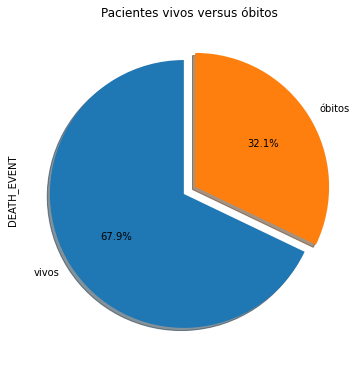

In [24]:
df['DEATH_EVENT'].value_counts().plot.pie(explode=[0.05,0.05,],startangle=90,autopct='%1.1f%%',labels=["vivos","óbitos"],shadow=True,figsize=(6,7))
plt.title("Pacientes vivos versus óbitos")
plt.show()

### 3.2 função de ajuste de proporção

A função adjust_sizes tem como objetivo ajustar o tamanho do Dataset de acordo com a proporção dos dados da coluna DEATH_EVENT para que fique igualmente distribuida. Ou seja, 50% dos dados com pacientes que sobreviveram e 50% com pacientes que foram a óbito.

In [32]:
def adjust_sizes(dataFrame):#função de ajuste de proporção
  aux=[]
  alive=np.array(dataFrame[dataFrame['DEATH_EVENT']==0])
  death=np.array(dataFrame[dataFrame['DEATH_EVENT']==1])
  if alive.shape[0]>death.shape[0]:#caso numero de sobreviventes for maior
    for i in range(death.shape[0]):
      aux.append(alive[i])
    alive=np.array(aux)
    
  else : #caso numero de óbitos for maior
      for i in range(alive.shape[0]):
        aux.append(death[i])
      death=np.array(aux)
  array=np.concatenate((alive,death),axis=0)
  dataFrame=pd.DataFrame(array)
  dataFrame.columns = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction',	
  'high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time' ,'DEATH_EVENT']
  return dataFrame

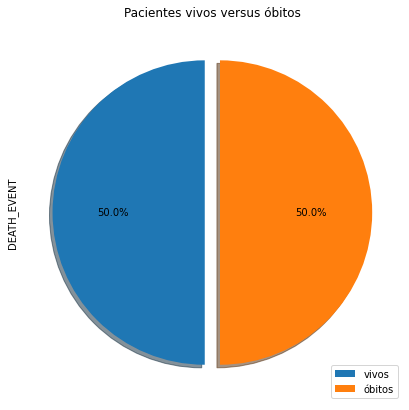

In [33]:
df2=adjust_sizes(df)
plt.title("Pacientes vivos versus óbitos")
df2['DEATH_EVENT'].value_counts().plot.pie(explode=[0.05,0.05,],startangle=90,autopct='%1.1f%%',
                                           shadow=True,figsize=(12,7),labels=None).legend(labels=["vivos","óbitos"],loc=4)                                       
plt.show()

Após o ajuste da proporção dos dados a quantidade linhas no dataframe passou de 299 para 192. Agora com os dados corretamente dimenzionalizados é os fazer uma análise mais detalhada.

In [19]:
df2#novo dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,49.0,1.0,80.0,0.0,30.0,1.0,427000.00,1.00,138.0,0.0,0.0,12.0,0.0
1,65.0,1.0,52.0,0.0,25.0,1.0,276000.00,1.30,137.0,0.0,0.0,16.0,0.0
2,53.0,0.0,63.0,1.0,60.0,0.0,368000.00,0.80,135.0,1.0,0.0,22.0,0.0
3,50.0,1.0,159.0,1.0,30.0,0.0,302000.00,1.20,138.0,0.0,0.0,29.0,0.0
4,60.0,0.0,2656.0,1.0,30.0,0.0,305000.00,2.30,137.0,1.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,73.0,0.0,582.0,0.0,20.0,0.0,263358.03,1.83,134.0,1.0,0.0,198.0,1.0
188,60.0,0.0,166.0,0.0,30.0,0.0,62000.00,1.70,127.0,0.0,0.0,207.0,1.0
189,55.0,0.0,2017.0,0.0,25.0,0.0,314000.00,1.10,138.0,1.0,0.0,214.0,1.0
190,65.0,1.0,258.0,1.0,25.0,0.0,198000.00,1.40,129.0,1.0,0.0,235.0,1.0


###3.3 Descrição estatisca e Matriz correlção

In [20]:
df2.describe() #descrição dos principais dados estatístico do dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,62.243057,0.473958,612.130208,0.395833,37.593750,0.401042,260861.690313,1.511094,136.453125,0.656250,0.333333,82.625000,0.500000
std,12.017098,0.500627,1122.480713,0.490307,12.990595,0.491391,94025.434139,1.192536,4.376028,0.476201,0.472637,49.776096,0.501307
min,41.000000,0.000000,23.000000,0.000000,14.000000,0.000000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,0.000000
25%,53.000000,0.000000,114.500000,0.000000,25.000000,0.000000,212500.000000,1.000000,134.000000,0.000000,0.000000,40.750000,0.000000
50%,60.000000,0.000000,248.500000,0.000000,35.000000,0.000000,255000.000000,1.180000,137.000000,1.000000,0.000000,83.000000,0.500000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302500.000000,1.700000,139.000000,1.000000,1.000000,110.250000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.000000


A matriz correlação a abaixo mede a dependencia entre duas variaveis. podendo ser obtida pela matriz covariança normalizada pelo desvio padrão.

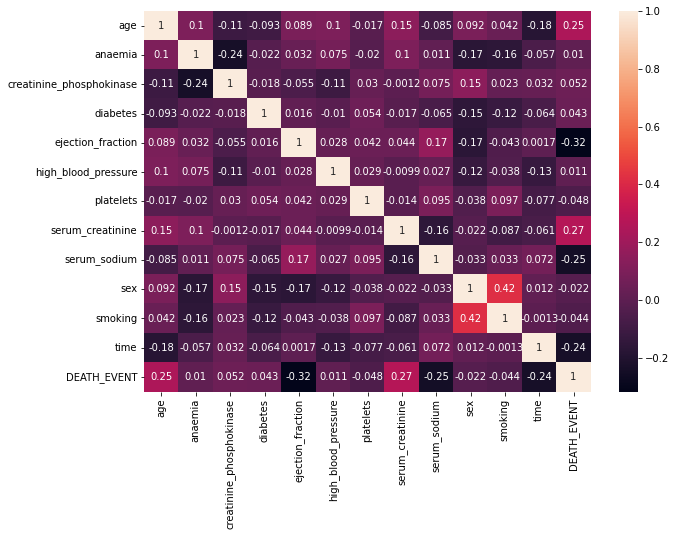

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df2.corr(),annot=True,ax=ax)

##**4.0 Remoção de dados**

Foram removidas as colunas anaemia, creatinine_phosphokinase,	diabetes,high_blood_pressure,	platelets,	sex	e smoking por sua baixa correlação com DEATH_EVENT.

In [36]:
df3=df2.drop(['anaemia',
              'creatinine_phosphokinase',
              'diabetes',
              'high_blood_pressure',
              'platelets',
              'sex',
              'smoking'],axis=1)


In [37]:
df3 # dataframe após remoção das colunas

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,49.0,30.0,1.00,138.0,12.0,0.0
1,65.0,25.0,1.30,137.0,16.0,0.0
2,53.0,60.0,0.80,135.0,22.0,0.0
3,50.0,30.0,1.20,138.0,29.0,0.0
4,60.0,30.0,2.30,137.0,30.0,0.0
...,...,...,...,...,...,...
187,73.0,20.0,1.83,134.0,198.0,1.0
188,60.0,30.0,1.70,127.0,207.0,1.0
189,55.0,25.0,1.10,138.0,214.0,1.0
190,65.0,25.0,1.40,129.0,235.0,1.0


Distribuição das variáveis remanescente.

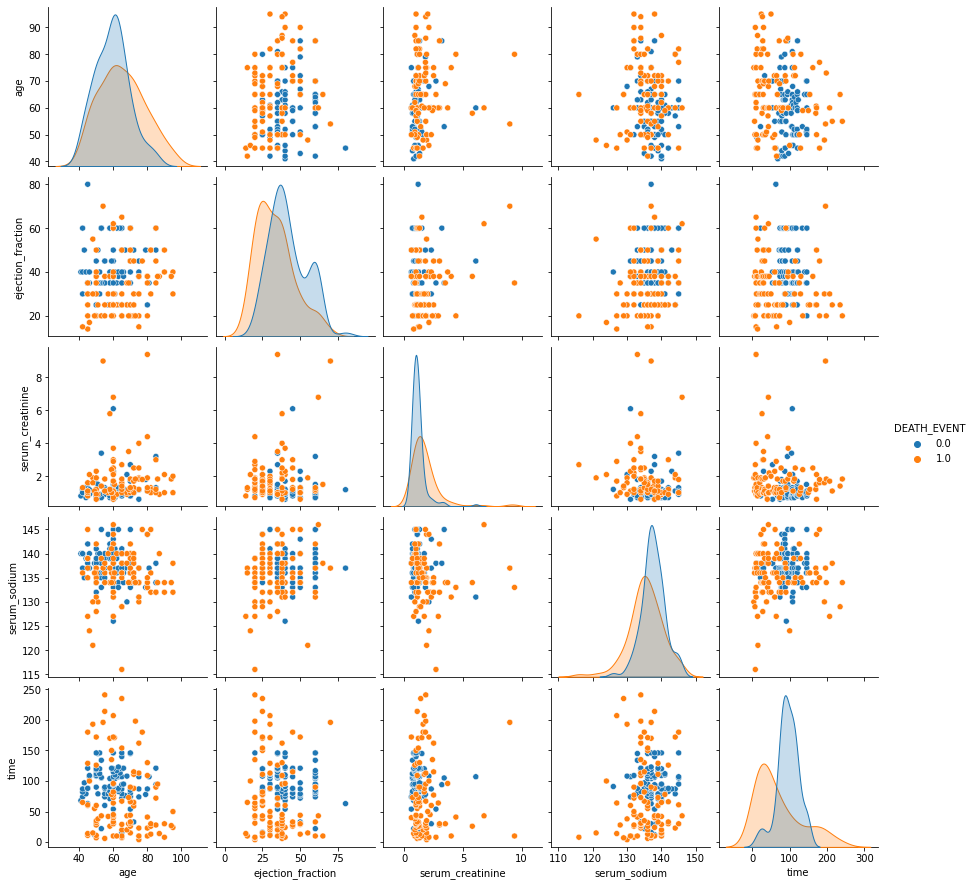

In [41]:
sns.pairplot(data=df3,hue='DEATH_EVENT')

##**5.0 Criação dos modelos**

Ao utilizar o método Cross Validation(CV) mesmo para valores altos de divisão do banco de teste, a acurácia média não estava convergindo. Então foi escolhido a utilização do método Holdout, sendo realizados vários testes e calculando acurácia média e demais pontuções, com um intervalo de confiança considerando um nível de significância de 5%.

Função cofidence_interval calcula valores em um intervalo de confiança de 95%

In [43]:
def confidence_interval(valeus):
  confidence=0.95 #nivel de confiança
  array = 1.0 * np.array(valeus)
  n = len(array) # tamanho do array
  mean = np.mean(array) #média
  standard_error= sp.stats.sem(array) #desvio padrão
  limit = standard_error* sp.stats.t.ppf((1 + confidence) / 2., n-1) #limite do intervalo de confiança
  return mean, limit

Função scores imprime as pontuações geradas pelo modelo.

In [44]:
def scores(accurray,precision0,precision1,f1score0,f1score1,recall0,recall1,titulo):
  print(f"{titulo}: ")
  print("                  precision    recall  f1-score \n")
  print(f"            LIVE       {np.round(confidence_interval(precision0)[0],2)}",
        f"     {np.round(confidence_interval(recall0)[0],2)}",
        f"     {np.round(confidence_interval(f1score0)[0],2)}")

  print(f"           DEATH       {np.round(confidence_interval(precision1)[0],2)}",
        f"     {np.round(confidence_interval(recall1)[0],2)}",
        f"     {np.round(confidence_interval(f1score1)[0],2)}")

  print(f" limit(+/-) LIVE   ",format(confidence_interval(precision0)[1],".1E"),
        f"    ",format(confidence_interval(recall0)[1],".1E"),
        f" ",format(confidence_interval(f1score0)[1],".1E"))

  print(f"limit(+/-) DEATH   ",format(confidence_interval(precision1)[1],".1E"),
        f"    ",format(confidence_interval(recall1)[1],".1E"),
        f" ",format(confidence_interval(f1score1)[1],".1E"),"\n")

  print(f"       acurracy                            {np.round(confidence_interval(accurray)[0],2)}")
  print(f"limit  acurracy                           ",format(confidence_interval(accurray)[0],".1E"),"\n\n")

Função train_model normaliza os dados utilizando z-score, divide o DataFrame em dados de treino(75%) e dados de teste(25%) e calcula as pontuações.

In [ ]:

def train_model(classifier,experiments,df2,titulo):
  accurray=[]
  f1score0=[]
  f1score1=[]
  precision0=[]
  precision1=[]
  recall0=[]
  recall1=[]

  for i in range(experiments):
    x=df2.iloc[:,0:df2.shape[1]-1]
    y=df2.iloc[:,df2.shape[1]-1]
    x=sp.stats.zscore(x) #normaliza utilizando o z-score

    x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.25)# divide a base de dados em teste e treino

    classifier.fit(x_train,y_train); # treina modelo
    predictions=classifier.predict(x_test);

    accurray.append(accuracy_score(y_test,predictions))

    pre=precision_score(y_test,predictions,average=None)
    f1=f1_score(y_test,predictions,average=None)
    rec=recall_score(y_test,predictions,average=None)

    precision0.append(pre[0])
    precision1.append(pre[1])

    f1score0.append(f1[0])
    f1score1.append(f1[1])

    recall0.append(rec[0])
    recall1.append(rec[1])
  scores(accurray,precision0,precision1,f1score0,f1score1,recall0,recall1,titulo)
  return np.mean(accurray)

Foram utilizados os modelos da biblioteca scikit-learn DecisionTreeClassifier, RandomForestClassifier , SVC em uma abordagem "one-vs-all" e "one-vs-one", KNeighborsClassifier, MLPClassifier e da biblioteca xgboost foi utilizado o modelo XGBRFClassifier.

In [52]:
mean_accurray=[]
models=[DecisionTreeClassifier(),
        LogisticRegression(solver="liblinear",max_iter=500),
        RandomForestClassifier(n_estimators=150,criterion='entropy',max_features='log2'),
        SVC(C=1.0,kernel="rbf",decision_function_shape="ovr"),
        SVC(C=1.0,kernel="rbf",decision_function_shape="ovo"),
        KNeighborsClassifier(n_neighbors=15),
        MLPClassifier(hidden_layer_sizes=[100,100],activation='relu',max_iter=1000),
        xgb.XGBRFClassifier(max_depth=3)
    
        ]
titulo=["Tree Classifier",
        "Logistic Regression",
        "RandomForestClassifier",
        "SVC",
        "SVC OVO",
        "KNN",
        'MLPClassifier',
        "xgb"]

##**6.0 Análise dos modelos**

In [53]:
for i in range(len(models)):
  mean_accurray.append(train_model(models[i],300,df3,titulo[i]))

Tree Classifier: 
                  precision    recall  f1-score 

            LIVE       0.77      0.78      0.77
           DEATH       0.78      0.77      0.77
 limit(+/-) LIVE    9.7E-03      9.6E-03   7.2E-03
limit(+/-) DEATH    9.3E-03      1.0E-02   7.2E-03 

       acurracy                            0.77
limit  acurracy                            7.7E-01 


Logistic Regression: 
                  precision    recall  f1-score 

            LIVE       0.73      0.77      0.75
           DEATH       0.75      0.71      0.73
 limit(+/-) LIVE    9.1E-03      9.4E-03   6.3E-03
limit(+/-) DEATH    9.7E-03      1.0E-02   7.1E-03 

       acurracy                            0.74
limit  acurracy                            7.4E-01 


RandomForestClassifier: 
                  precision    recall  f1-score 

            LIVE       0.84      0.8      0.81
           DEATH       0.8      0.84      0.82
 limit(+/-) LIVE    8.6E-03      9.1E-03   6.0E-03
limit(+/-) DEATH    8.5E-03      8.6

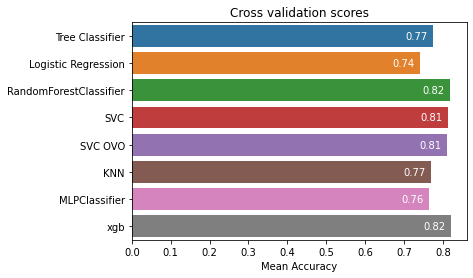

In [54]:
x=len(titulo)
bar = sns.barplot(x = mean_accurray, y = titulo, orient = "h")
bar.set_xlabel("Mean Accuracy")
bar.set_title("Cross validation scores")
for b in bar.patches:
    width = b.get_width()    
    bar.text(width -0.07, b.get_y() + b.get_height() / 2, '{:1.2f}'.format(width), 
             ha = 'left', va = 'center',color="#FFFFFF")  